# Google Drive Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Applied\ AI\ course\ Assignments/Case\ Study\ 1

/content/drive/My Drive/Applied AI course Assignments/Case Study 1


In [ ]:
!ls

 Custom_Ensemble_Model.pdf
 Data
 Data_processed
'Elo_DataPrep&Featurization'
'Elo_DataPrep&Featurization.pdf'
 Elo_EDA.ipynb
 Elo_EDA.pdf
 Feature_selection_and_Feature_Correlations.ipynb
 Final_dataframes
 Holiday_list_Brazil.gsheet
 MetaModel
 MetaModel_submitted
 Models
'More_Feature_Engineering(Second_Iteration)'
 New_Data_processed
 rajat.malviya5412@gmail.com_CS1.gdoc
 submission_bayesian_ridge.csv
 submission_goss_repeated_KFOLD.csv
 submission_new_boosting.csv
 submission_new_goss.csv


# Library Imports

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb

#H20 Modules
#import h2o
#from h2o.grid.grid_search import H2OGridSearch
#from h2o.estimators.random_forest import H2ORandomForestEstimator

from sklearn.metrics import mean_squared_error
from math import sqrt

import gc
import warnings
warnings.filterwarnings('ignore')

Splitting our data into test and train

In [ ]:
data = pd.read_csv('New_Data_processed/train_features_without_merchant.csv', index_col=0)
submission_kaggle = pd.read_csv('New_Data_processed/test_features_without_merchant.csv', index_col=0)

In [ ]:
data.head()

,card_id,feature_1,feature_2,feature_3,target,quarter_first_active_month,first_active_month_diff_from_today,rare_datapoints,cat_time_feature1,cat_time_feature2,cat_time_feature3,cat_time_ratio1,cat_time_ratio2,cat_time_ratio3,feature_sum,feature_mean,feature_max,feature_min,feature_std,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,days_feature_3_ratio,transactions_is_weekend_sum,transactions_is_weekend_mean,transactions_purchase_on_holiday_sum,transactions_purchase_on_holiday_mean,transactions_weekday_nunique,transactions_weekday_sum,transactions_weekday_mean,transactions_purchase_hour_nunique,transactions_purchase_hour_mean,transactions_purchase_hour_min,transactions_purchase_hour_max,transactions_week_of_year_nunique,transactions_week_of_year_mean,transactions_week_of_year_min,transactions_week_of_year_max,...,new_transactions_purchase_amount_var,purchase_date_diff,new_purchase_date_diff,purchase_date_average,new_purchase_date_average,purchase_date_diff_now,new_purchase_date_diff_now,purchase_date_diff_now_min,new_purchase_date_diff_now_min,first_buy,new_first_buy,last_buy,new_last_buy,card_id_total,card_id_ratio,purchase_amount_total,purchase_amount_mean,purchase_amount_max,purchase_amount_min,purchase_amount_ratio,month_diff_mean,month_diff_ratio,month_lag_mean,month_lag_max,month_lag_min,category_1_mean,category_1_sum,installments_mean,installments_total,installments_ratio,installments_max,installments_min,duration_mean,duration_max,duration_min,amount_month_ratio_mean,amount_month_ratio_min,amount_month_ratio_max,CLV,new_CLV
0,C_ID_92a2005557,0.013145,0.00875,0.011430,-0.8203,2,1215,0,15.970,10.630,13.88,0.000011,0.000007,0.000009,0.03333,0.011110,0.013145,0.008750,0.002214,15.970,0.000011,10.630,0.000007,13.88,0.000009,90,0.3462,8,0.03076,7,835,3.210,23,13.310,0,23,35,33.06,1,52,...,0.018430,243,55,0.934615,2.391304,947,884,1190,939,26,277,269,332,283.0,0.088462,-179.210920,-1.214025,1.962252,-1.464,0.079787,62.97,1.0000,-2.4340,2.0,-7.0,0.00000,0.0,0.01538,4.0,0.000000,1.0,0.0,-38.210060,63.088936,-46.70,-0.03860,-0.04718,0.061320,-1370.58060,-9.673697
1,C_ID_3d0044924f,0.010710,0.01138,0.010284,0.3928,1,1366,0,14.630,15.555,14.05,0.000008,0.000008,0.000007,0.03238,0.010796,0.011380,0.010284,0.000556,14.630,0.000008,15.555,0.000008,14.05,0.000007,132,0.3772,17,0.04858,7,1177,3.363,24,14.720,0,23,50,25.22,1,52,...,0.000207,390,57,1.114286,9.500000,972,914,1362,971,5,396,395,453,356.0,0.017143,-214.361800,-1.326092,3.928639,-1.481,0.020740,64.90,1.0030,-3.5310,2.0,-11.0,0.08856,31.0,2.55000,549.0,0.011050,11.0,0.0,-43.026512,130.346760,-48.84,-0.04086,-0.04614,0.118385,-2268.14940,-0.804087
2,C_ID_d639edf6cd,0.010610,0.00875,0.010284,0.6880,3,1519,0,16.110,13.300,15.62,0.000007,0.000006,0.000007,0.02965,0.009880,0.010610,0.008750,0.000992,16.110,0.000007,13.300,0.000006,15.62,0.000007,11,0.2559,3,0.06976,7,142,3.303,14,17.900,8,23,22,18.38,2,49,...,0.000000,412,0,9.581395,0.000000,945,885,1357,885,163,635,575,635,44.0,0.023256,-29.867586,-1.378507,-0.846043,-1.430,0.024006,62.30,0.9897,-6.6000,2.0,-11.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.0,-42.959410,-26.224392,-45.03,-0.04425,-0.04614,-0.027288,-40.03424,-0.022587
3,C_ID_186d6a6901,0.010710,0.01417,0.010284,0.1425,3,1123,0,12.030,15.910,11.55,0.000010,0.000013,0.000009,0.03516,0.011720,0.014170,0.010284,0.002129,12.030,0.000010,15.910,0.000013,11.55,0.000009,11,0.1428,0,0.00000,7,215,2.793,16,14.445,0,23,20,32.00,1,52,...,0.004345,155,42,2.012987,6.000000,944,895,1099,937,25,187,180,229,84.0,0.090909,-54.147614,-1.307784,0.878701,-1.475,0.094082,62.80,1.0010,-1.1180,2.0,-4.0,0.29880,13.0,1.80500,89.0,0.059524,4.0,-2.0,-41.100050,27.235336,-47.12,-0.04163,-0.04700,0.028352,-121.40041,-1.037295
4,C_ID_cdbd2c0db2,0.008060,0.01417,0.010284,-0.1598,4,1062,0,8.555,15.050,10.92,0.000008,0.000013,0.000010,0.03250,0.010830,0.014170,0.008060,0.003092,8.555,0.000008,15.050,0.000013,10.92,0.000010,42,0.3157,2,0.01504,7,431,3.240,22,13.05

In [ ]:
y_data = data['target']
data.drop(columns=['target', 'card_id', 'rare_datapoints'], inplace=True, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.15)

In [ ]:
X_train.head()

,feature_1,feature_2,feature_3,quarter_first_active_month,first_active_month_diff_from_today,cat_time_feature1,cat_time_feature2,cat_time_feature3,cat_time_ratio1,cat_time_ratio2,cat_time_ratio3,feature_sum,feature_mean,feature_max,feature_min,feature_std,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,days_feature_3_ratio,transactions_is_weekend_sum,transactions_is_weekend_mean,transactions_purchase_on_holiday_sum,transactions_purchase_on_holiday_mean,transactions_weekday_nunique,transactions_weekday_sum,transactions_weekday_mean,transactions_purchase_hour_nunique,transactions_purchase_hour_mean,transactions_purchase_hour_min,transactions_purchase_hour_max,transactions_week_of_year_nunique,transactions_week_of_year_mean,transactions_week_of_year_min,transactions_week_of_year_max,transactions_month_diff_sum,transactions_month_diff_mean,transactions_month_diff_min,...,new_transactions_purchase_amount_var,purchase_date_diff,new_purchase_date_diff,purchase_date_average,new_purchase_date_average,purchase_date_diff_now,new_purchase_date_diff_now,purchase_date_diff_now_min,new_purchase_date_diff_now_min,first_buy,new_first_buy,last_buy,new_last_buy,card_id_total,card_id_ratio,purchase_amount_total,purchase_amount_mean,purchase_amount_max,purchase_amount_min,purchase_amount_ratio,month_diff_mean,month_diff_ratio,month_lag_mean,month_lag_max,month_lag_min,category_1_mean,category_1_sum,installments_mean,installments_total,installments_ratio,installments_max,installments_min,duration_mean,duration_max,duration_min,amount_month_ratio_mean,amount_month_ratio_min,amount_month_ratio_max,CLV,new_CLV
166340,0.010480,0.01417,0.011430,4,1397,14.64,19.80,15.96,0.000007,0.000010,0.000008,0.03607,0.012024,0.014170,0.01048,0.001915,14.64,0.000007,19.80,0.000010,15.96,0.000008,7,0.2693,0,0.00000,6,67,2.576,8,11.120,7,15,20,27.970,2,50,848,32.62,32,...,0.045840,308,4,11.846154,2.000000,987,942,1295,946,103,452,411,456,28.0,0.076923,-11.127682,-0.908006,0.085058,-1.3580,0.103100,65.10,0.9960,-3.6910,2.0,-9.0,0.0000,0.0,0.00000,0.0,0.000000,0.0,0.0,-29.461819,2.808384,-43.47,-0.028000,-0.04245,0.002579,-8.039194,-0.064002
104288,0.013145,0.01138,0.011430,3,2281,29.98,25.97,26.06,0.000006,0.000005,0.000005,0.03595,0.011986,0.013145,0.01138,0.001004,29.98,0.000006,25.97,0.000005,26.06,0.000005,5,0.2380,3,0.14280,6,72,3.428,12,13.050,0,22,12,23.230,1,52,654,31.14,31,...,0.002302,409,48,19.476190,6.857143,955,886,1364,934,918,1348,1327,1396,28.0,0.333333,-14.134623,-1.120087,0.534726,-1.4650,0.496802,62.28,1.0000,-0.7617,2.0,-12.0,0.0952,2.0,2.47700,42.0,0.135135,9.0,-2.0,-34.829260,16.573593,-46.16,-0.036000,-0.04724,0.017256,-6.368130,-1.054566
194104,0.013145,0.00875,0.011430,4,1427,18.75,12.49,16.31,0.000009,0.000006,0.000008,0.03333,0.011110,0.013145,0.00875,0.002214,18.75,0.000009,12.49,0.000006,16.31,0.000008,26,0.4407,1,0.01695,7,220,3.729,15,16.080,0,23,13,11.016,1,18,2401,40.70,40,...,0.023760,120,0,2.033898,0.000000,1241,1157,1361,1157,67,271,187,271,63.0,0.067797,-36.774150,-1.186345,0.658077,-1.4510,0.070319,80.70,0.9830,0.0674,2.0,-2.0,0.0000,0.0,0.01695,1.0,0.000000,1.0,0.0,-47.845220,27.357864,-58.80,-0.029420,-0.03625,0.015818,-49.821934,-0.241602
110090,0.013145,0.01138,0.011430,4,1397,18.36,15.91,15.96,0.000009,0.000008,0.000008,0.03595,0.011986,0.013145,0.01138,0.001004,18.36,0.000009,15.91,0.000008,15.96,0.000008,5,0.3572,0,0.00000,6,46,3.285,7,11.140,0,20,11,25.000,2,39,513,36.66,36,...,2.578000,260,53,18.571429,17.666667,1095,1036,1355,1089,43,309,303,362,17.0,0.214286,-5.474253,-0.096724,2.677718,-1.2790,-0.170228,73.00,0.9917,-1.0480,2.0,-7.0,0.3333,1.0,5.95300,32.0,0.777778,16.0,2.0,-3.994877,96.421295,-46.70,-0.002304,-0.03558,0.074367,-2.519685,0.092702
6389,0.010610,0.00875,0.010284,3,1550,16.45,13.56,15.94,0.000007,0.000006,0.000007,0.02965,0.009880,0.010610,0.00875,0.000992,16.45,0.000007,13.56,0.000006,15.94,0.000007,16,0.3720,1,0.02325,7,141,3.280,14,15.695,8,23,11,13.400,6,22,1744,40

In [ ]:
X_test.head()

,feature_1,feature_2,feature_3,quarter_first_active_month,first_active_month_diff_from_today,cat_time_feature1,cat_time_feature2,cat_time_feature3,cat_time_ratio1,cat_time_ratio2,cat_time_ratio3,feature_sum,feature_mean,feature_max,feature_min,feature_std,days_feature_1,days_feature_1_ratio,days_feature_2,days_feature_2_ratio,days_feature_3,days_feature_3_ratio,transactions_is_weekend_sum,transactions_is_weekend_mean,transactions_purchase_on_holiday_sum,transactions_purchase_on_holiday_mean,transactions_weekday_nunique,transactions_weekday_sum,transactions_weekday_mean,transactions_purchase_hour_nunique,transactions_purchase_hour_mean,transactions_purchase_hour_min,transactions_purchase_hour_max,transactions_week_of_year_nunique,transactions_week_of_year_mean,transactions_week_of_year_min,transactions_week_of_year_max,transactions_month_diff_sum,transactions_month_diff_mean,transactions_month_diff_min,...,new_transactions_purchase_amount_var,purchase_date_diff,new_purchase_date_diff,purchase_date_average,new_purchase_date_average,purchase_date_diff_now,new_purchase_date_diff_now,purchase_date_diff_now_min,new_purchase_date_diff_now_min,first_buy,new_first_buy,last_buy,new_last_buy,card_id_total,card_id_ratio,purchase_amount_total,purchase_amount_mean,purchase_amount_max,purchase_amount_min,purchase_amount_ratio,month_diff_mean,month_diff_ratio,month_lag_mean,month_lag_max,month_lag_min,category_1_mean,category_1_sum,installments_mean,installments_total,installments_ratio,installments_max,installments_min,duration_mean,duration_max,duration_min,amount_month_ratio_mean,amount_month_ratio_min,amount_month_ratio_max,CLV,new_CLV
55119,0.01071,0.00875,0.010284,3,1123,12.030,9.83,11.55,0.000010,0.000008,0.000009,0.02974,0.009920,0.01071,0.008750,0.001030,12.030,0.000010,9.83,0.000008,11.55,0.000009,64,0.3232,0,0.00000,7,705,3.560,22,15.086,0,23,23,37.470,1,52,6233,31.48,31,...,0.005203,152,53,0.767677,6.625000,950,888,1102,941,22,183,174,236,206.0,0.040404,-122.952360,-1.220250,0.861198,-1.423,0.042355,63.00,1.0010,-1.2230,2.0,-4.0,0.0000,0.0,0.000,0.0,0.000000,0.0,0.0,-38.437614,28.050537,-45.53,-0.038760,-0.04584,0.026409,-741.807400,-1.268849
63637,0.01071,0.01417,0.010284,3,1185,12.695,16.78,12.19,0.000009,0.000012,0.000009,0.03516,0.011720,0.01417,0.010284,0.002129,12.695,0.000009,16.78,0.000012,12.19,0.000009,0,0.0000,0,0.00000,4,12,1.200,7,12.600,8,21,7,37.000,4,52,313,31.30,31,...,0.000000,223,60,22.300000,60.000000,946,883,1169,943,17,243,240,303,11.0,0.100000,21.889297,1.588735,4.636964,-1.478,-0.031708,62.30,0.9907,-1.8010,2.0,-6.0,0.1000,1.0,6.600,66.0,0.000000,12.0,1.0,49.430237,148.976610,-46.53,0.048950,-0.04767,0.150181,7.223115,-0.023122
199002,0.01071,0.01138,0.010284,1,1307,14.000,14.88,13.44,0.000008,0.000009,0.000008,0.03238,0.010796,0.01138,0.010284,0.000556,14.000,0.000008,14.88,0.000009,13.44,0.000008,10,0.3572,0,0.00000,7,96,3.428,13,15.040,3,23,18,21.670,3,42,908,32.44,32,...,0.133500,318,14,11.357143,4.666667,979,934,1297,948,11,360,329,374,31.0,0.107143,-1.643210,-0.383044,5.061511,-1.377,1.969479,65.10,1.0070,-3.7270,2.0,-9.0,0.0714,2.0,2.500,45.0,0.071429,7.0,2.0,-12.639007,166.991620,-45.44,-0.011604,-0.04196,0.153415,-0.477665,-0.100120
171951,0.01061,0.01417,0.010284,4,1032,10.950,14.62,10.61,0.000010,0.000014,0.000010,0.03506,0.011690,0.01417,0.010284,0.002153,10.950,0.000010,14.62,0.000014,10.61,0.000010,4,0.1904,4,0.19040,7,61,2.904,11,13.430,2,22,9,25.230,2,52,653,31.10,31,...,0.055820,76,60,3.619048,3.529412,944,883,1020,943,13,90,89,150,38.0,0.809524,-17.681833,-0.943066,1.600148,-1.455,1.042160,62.70,1.0160,0.2461,2.0,-1.0,0.3809,8.0,1.574,30.0,0.764706,2.0,-2.0,-29.643728,49.603905,-45.80,-0.030030,-0.04623,0.051617,-5.847680,-4.855341
83703,0.01048,0.01417,0.011430,1,1335,13.990,18.90,15.26,0.000008,0.000011,0.000009,0.03607,0.012024,0.01417,0.010480,0.001915,13.990,0.000008,18.90,0.000011,15.26,0.000009,11,0.3547,1,0.03226,7,105,3.387,11,13.450,8,20,11,10.484,5,20,1258,40.60,40,...,0.000629,

In [ ]:
X_train.shape

(171629, 211)

In [ ]:
X_test.shape

(30288, 211)

In [ ]:
X_train.replace([-np.inf,np.inf], np.nan, inplace=True)
X_test.replace([-np.inf,np.inf], np.nan, inplace=True)

In [ ]:
X_train.columns[X_train.isna().any()]

Index(['new_category_2_sum', 'new_category_3_sum',
       'new_transactions_duration_var', 'new_transactions_duration_skew',
       'installments_ratio'],
      dtype='object')

In [ ]:
X_test.columns[X_test.isna().any()]

Index(['new_category_2_sum', 'new_category_3_sum',
       'new_transactions_duration_var', 'new_transactions_duration_skew',
       'installments_ratio'],
      dtype='object')

In [ ]:
X_train['new_category_2_sum'].fillna(X_train['new_category_2_sum'].mode()[0], inplace=True)
X_test['new_category_2_sum'].fillna(X_train['new_category_2_sum'].mode()[0], inplace=True)
X_train['new_category_3_sum'].fillna(X_train['new_category_3_sum'].mode()[0], inplace=True)
X_test['new_category_3_sum'].fillna(X_train['new_category_3_sum'].mode()[0], inplace=True)
X_train['new_transactions_duration_var'].fillna(X_train['new_transactions_duration_var'].mode()[0], inplace=True)
X_test['new_transactions_duration_var'].fillna(X_train['new_transactions_duration_var'].mode()[0], inplace=True)
X_train['new_transactions_duration_skew'].fillna(X_train['new_transactions_duration_skew'].mode()[0], inplace=True)
X_test['new_transactions_duration_skew'].fillna(X_train['new_transactions_duration_skew'].mode()[0], inplace=True)
X_train['installments_ratio'].fillna(X_train['installments_ratio'].mode()[0], inplace=True)
X_test['installments_ratio'].fillna(X_train['installments_ratio'].mode()[0], inplace=True)

In [ ]:
X_train.columns[X_train.isna().any()]

Index([], dtype='object')

In [ ]:
X_test.columns[X_test.isna().any()]

Index([], dtype='object')

# Models

## 1. Linear Regression


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_rmse = sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))
print("Train RMSE: {:2.5f}".format(train_rmse))
print("Test RMSE: {:2.5f}".format(test_rmse))

Train RMSE: 3.72116
Test RMSE: 3.89320


So Linear Regression gave us an RMSE of 3.89320 on our test data.

## 2. SGD Regressor

In [ ]:
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
params = {'alpha': alpha}

model=SGDRegressor()
grid_search = GridSearchCV(model, params,scoring = 'neg_root_mean_squared_error', cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.0001}

In [ ]:
model = SGDRegressor(alpha=0.0001)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE: {:2.5f}".format(train_rmse))
print("Test RMSE: {:2.5f}".format(test_rmse))

Train RMSE: 3.74499
Test RMSE: 3.91523


## 3. Random Forest Regressor

### a. Sklearn Implementation

In [ ]:
params = {
            'n_estimators': [10, 50, 100, 150, 250, 500],
            'max_depth': [2, 4, 6, 8, 10],
            #'col_sample_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'min_samples_split': [2, 4, 6, 8, 10],
            
}

model=RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = 5)
random_search.fit(X_train, y_train)
random_search.best_params_

{'n_estimators': 500, 'min_samples_split': 8, 'max_depth': 10}

In [ ]:
model = RandomForestRegressor(n_jobs=-1, n_estimators = 500, min_samples_split = 8, max_depth = 10)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE: {:2.5f}".format(train_rmse))
print("Test RMSE: {:2.5f}".format(test_rmse))

Train RMSE: 3.62397
Test RMSE: 3.75178


## Feature Importance

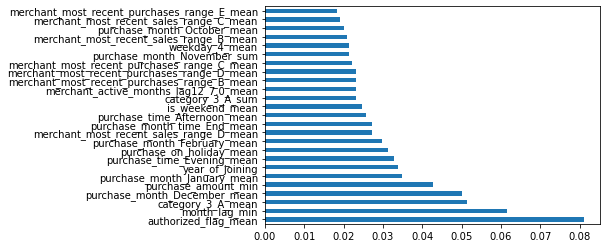

In [ ]:
#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python/51520906
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

### b. H20 implementation

In [ ]:
#Preparing dataframe for H20 model
X_train['target'] = y_train
X_test['target'] = y_test
X_test.head()

,feature_1_1,feature_1_2,feature_1_3,feature_2_2,feature_3_0,year_of_joining,authorized_flag_mean,category_2_1.0_mean,category_2_3.0_mean,category_3_A_sum,...,merchant_most_recent_purchases_range_D_mean,merchant_most_recent_purchases_range_E_mean,merchant_active_months_lag12_7.0_mean,merchant_active_months_lag12_8.0_sum,merchant_active_months_lag12_8.0_mean,merchant_active_months_lag12_9.0_mean,merchant_active_months_lag12_10.0_sum,merchant_active_months_lag12_10.0_mean,merchant_active_months_lag12_11.0_mean,target
26183,0,0,1,0,0,2017,0.9106,0.9644,0.0,0.0,...,0.11475,0.11475,0.09840,0,0.00000,0.00000,0,0.0,0.00000,-0.1786
87249,0,0,0,1,0,2017,1.0000,1.0000,0.0,29.0,...,0.25800,0.19360,0.06450,0,0.00000,0.00000,0,0.0,0.00000,0.3293
104760,0,0,1,0,0,2017,0.9520,0.0714,0.0,42.0,...,0.16280,0.06976,0.02325,0,0.00000,0.02325,0,0.0,0.00000,-0.1616
151752,0,0,1,1,0,2017,0.9360,0.9230,0.0,78.0,...,0.20940,0.12790,0.09300,3,0.03488,0.00000,0,0.0,0.01163,1.4130
58949,0,1,0,1,1,2015,0.9580,0.9956,0.0,237.0,...,0.13060,0.05307,0.02040,0,0.00000,0.00408,0,0.0,0.00000,0.3916


In [ ]:
#h2o.shutdown(prompt = True)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.2+13, mixed mode)
  Starting server from C:\Users\rajat\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\rajat\AppData\Local\Temp\tmphy9nfe9u
  JVM stdout: C:\Users\rajat\AppData\Local\Temp\tmphy9nfe9u\h2o_rajat_started_from_python.out
  JVM stderr: C:\Users\rajat\AppData\Local\Temp\tmphy9nfe9u\h2o_rajat_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,1 month and 22 days
H2O_cluster_name:,H2O_from_python_rajat_3tmsps
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.977 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
df_train = h2o.H2OFrame(X_train)
df_test = h2o.H2OFrame(X_test)
train, valid = df_train.split_frame(ratios=[0.8], seed = 1)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
X = list(X_train.columns)
Y = 'target'

In [ ]:
# Setting the random forest parameters

params = {
            'ntrees': [10, 50, 100, 150, 250],
            'max_depth': [2, 4 , 6, 8, 10],
            #'col_sample_rate': [0.7, 0.8, 0.9]
}

search_criteria = {'strategy': "RandomDiscrete",
                   'seed': 1,
                   'max_models' : 50,
                   'stopping_metric': "MAE"
                   #'stopping_tolerance': 0.0005
                   }

rf_grid = H2OGridSearch(model=H2ORandomForestEstimator,   # Model to be trained
                          grid_id='rf_grid',                  # Grid Search ID
                          hyper_params=params,                 # Dictionary of parameters
                          search_criteria=search_criteria,   # RandomDiscrete
                          )

In [ ]:

rf_grid.train(x = X,
              y = Y,
              training_frame = df_train,
              validation_frame = valid,
              nfolds = 5,
              score_each_iteration=True
            )



drf Grid Build progress: |████████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: max_depth, 2
Hyper-parameter: ntrees, 250
failure_details: Job Canceled
failure_stack_traces: water.Job$JobCancelledException
	at hex.tree.SharedTree$Driver.scoreAndBuildTrees(SharedTree.java:452)
	at hex.tree.SharedTree$Driver.computeImpl(SharedTree.java:362)
	at hex.ModelBuilder$Driver.compute2(ModelBuilder.java:252)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1557)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:974)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1477)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)




In [ ]:
rf_gridperf = rf_grid.get_grid(sort_by='RMSE',decreasing = False)
rf_gridperf

     max_depth ntrees         model_ids                rmse
0           10    250  rf_grid_model_12   3.797168599364064
1           10    150  rf_grid_model_28  3.7991565084652277
2           10    100  rf_grid_model_20   3.800006373923407
3           10     50  rf_grid_model_15   3.800882747861182
4            8    100  rf_grid_model_21  3.8023507825108305
5            8    150   rf_grid_model_8   3.802949828391346
6            8    250  rf_grid_model_26  3.8031737446752687
7            8     50  rf_grid_model_13  3.8036541818800007
8            6     50   rf_grid_model_2  3.8097782470581105
9            6    150  rf_grid_model_19  3.8098875864673043
10           6     50   rf_grid_model_5   3.809942503750028
11           6    250  rf_grid_model_23  3.8102334540451532
12           6    100  rf_grid_model_24  3.8114722133080443
13           6     10   rf_grid_model_6  3.8121856694450065
14           8     10  rf_grid_model_17  3.8122360281646475
15           6     10   rf_grid_model_3 

In [ ]:
best_rf_model = rf_gridperf.models[0]
best_rf_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid_model_12


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,250.0,250.0,1594373.0,10.0,10.0,10.0,340.0,618.0,502.672




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 14.4282220790404
RMSE: 3.798449957422159
MAE: 1.6120709765169159
RMSLE: NaN
Mean Residual Deviance: 14.4282220790404

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 13.155474027200459
RMSE: 3.627047563404767
MAE: 1.5680386486000137
RMSLE: NaN
Mean Residual Deviance: 13.155474027200459

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 14.418489371996447
RMSE: 3.797168599364064
MAE: 1.6115290738615986
RMSLE: NaN
Mean Residual Deviance: 14.418489371996447

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.611508,0.015594098,1.6315565,1.618385,1.6058568,1.612387,1.5893549
1,mean_residual_deviance,14.418788,0.62874746,15.208486,14.485567,13.915995,14.806686,13.677204
2,mse,14.418788,0.62874746,15.208486,14.485567,13.915995,14.806686,13.677204
3,r2,0.027360845,0.0018301952,0.025661824,0.02917889,0.026804727,0.029423535,0.025735253
4,residual_deviance,14.418788,0.62874746,15.208486,14.485567,13.915995,14.806686,13.677204
5,rmse,3.7964857,0.08280265,3.8998058,3.805991,3.7304149,3.8479457,3.6982703
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-09-13 14:14:23,1:17:19.552,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-09-13 14:14:24,1:17:19.881,1.0,3.898983,1.656886,15.202070,3.786288,1.628114,14.335974
2,,2020-09-13 14:14:24,1:17:20.193,2.0,3.941279,1.667466,15.533680,3.696618,1.602373,13.664984
3,,2020-09-13 14:14:24,1:17:20.516,3.0,3.906103,1.659505,15.257640,3.676889,1.596056,13.519513
4,,2020-09-13 14:14:25,1:17:20.844,4.0,3.891854,1.652169,15.146527,3.668649,1.589160,13.458984
5,,2020-09-13 14:14:25,1:17:21.188,5.0,3.905598,1.655014,15.253692,3.657797,1.584213,13.379481
6,,2020-09-13 14:14:25,1:17:21.531,6.0,3.893072,1.652181,15.156007,3.660512,1.583640,13.399350
7,,2020-09-13 14:14:26,1:17:21.891,7.0,3.892066,1.651786,15.148178,3.658275,1.582307,13.382976
8,,2020-09-13 14:14:26,1:17:22.229,8.0,3.876292,1.648315,15.025637,3.651749,1.581613,13.335269
9,,2020-09-13 14:14:26,1:17:22.588,9.0,3.865685,1.645691,14.943523,3.650959,1.580501,13.329502



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,month_lag_min,3.234717e+06,1.000000,0.078211
1,authorized_flag_mean,2.889538e+06,0.893289,0.069865
2,year_of_joining,1.962469e+06,0.606690,0.047450
3,purchase_month_December_mean,1.866738e+06,0.577095,0.045135
4,purchase_month_January_mean,1.721078e+06,0.532064,0.041613
5,purchase_month_February_mean,1.522952e+06,0.470815,0.036823
6,category_3_A_mean,1.458596e+06,0.450919,0.035267
7,purchase_time_Evening_mean,1.197613e+06,0.370237,0.028957
8,purchase_time_Afternoon_mean,1.156866e+06,0.357641,0.027972
9,purchase_month_time_End_mean,1.141714e+06,0.352956,0.027605



See the whole table with table.as_data_frame()


In [ ]:
#save best model for later
model_path = h2o.save_model(model=best_rf_model, path="rf_model", force=True)

In [ ]:
y_pred_train = best_rf_model.predict(df_train)
y_pred_test = best_rf_model.predict(df_test)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
t1 = h2o.as_list(y_pred_train)
y_pred_train = t1['predict'].tolist()
t2 = h2o.as_list(y_pred_test)
y_pred_test = t2['predict'].tolist()

r1 = h2o.as_list(df_train['target'])
y_train = r1['target'].tolist()
r2 = h2o.as_list(df_test['target'])
y_test = r2['target'].tolist()

In [ ]:
train_rmse = sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE: {:2.5f}".format(train_rmse))
print("Test RMSE: {:2.5f}".format(test_rmse))

Train RMSE: 3.61473
Test RMSE: 3.80945


In [ ]:
h2o.shutdown(prompt = True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? y
H2O session _sid_86ab closed.


## 4. Gradient Boosted Decision Trees Regressor

### a. LightGBM

In [ ]:
clf = lgb.LGBMRegressor(n_jobs = -1, verbose = 1)

params = {
            #'min_samples_split': [1, 3, 5],  #[1, 2, 3, 4, 5]
            'num_leaves': [30, 50, 100, 150, 200],
            'n_estimators': [100, 500, 1000, 1500, 2000, 2500, 3000],
            #'subsample' : [0.1, 0.4, 0.6, 0.8, 1.0],
            'colsample_bytree' : [0.1, 0.4, 0.6, 0.8, 1.0],
            'learning_rate': [0.0001 ,0.001, 0.1],
            'max_depth': [4, 6, 8, 10],
}

grid_search = RandomizedSearchCV(clf, params, scoring = 'neg_mean_absolute_error', cv = 5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'num_leaves': 100,
 'n_estimators': 2500,
 'max_depth': 8,
 'learning_rate': 0.0001,
 'colsample_bytree': 0.6}

In [ ]:
model = lgb.LGBMRegressor(n_jobs=-1, 
                      num_leaves = 100,
                      n_estimators = 2500,
                      max_depth = 8,
                      learning_rate = 0.0001,
                      colsample_bytree = 0.6)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_rmse = sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print("Train RMSE: {:2.5f}".format(train_rmse))
print("Test RMSE: {:2.5f}".format(test_rmse))

Train RMSE: 3.82155
Test RMSE: 3.83794


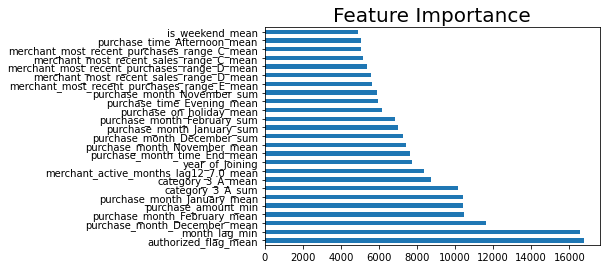

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.title('Feature Importance', fontsize = 20)
plt.show()

# Results:

In [ ]:
table = PrettyTable(['Model', 'Train RMSE', 'Test RMSE'])
table.add_row(['Linear Regression', 3.72116, 3.89320])
table.add_row(['SGD Regressor', 3.74499, 3.91523])
table.add_row(['Random Forest Regressor - sklearn implementation', 3.62397, 3.75178])
table.add_row(['Random Forest Regressor - H2O implementation', 3.61473, 3.80945])
table.add_row(['LGBM', 3.82155, 3.83794])
print(table)

+--------------------------------------------------+------------+-----------+
|                      Model                       | Train RMSE | Test RMSE |
+--------------------------------------------------+------------+-----------+
|                Linear Regression                 |  3.72116   |   3.8932  |
|                  SGD Regressor                   |  3.74499   |  3.91523  |
| Random Forest Regressor - sklearn implementation |  3.62397   |  3.75178  |
|   Random Forest Regressor - H2O implementation   |  3.61473   |  3.80945  |
|                       LGBM                       |  3.82155   |  3.83794  |
+--------------------------------------------------+------------+-----------+
